In [2]:
import numpy as np
import pandas as pd
import glob
import os
from importlib import reload

from sklearn.metrics.pairwise import haversine_distances

In [3]:
src = '../results/'
dst = '../plots/'
filename = src + 'tally_uqlocations.tsv'
data = pd.read_table(filename, header=None)
data.columns = ['incountry_rank', 'country', 'location', 'score', 'latitude', 'longitude']
print(data.shape)
countries = pd.unique(data.country)
data.head()

(15427, 6)


,incountry_rank,country,location,score,latitude,longitude
0,0,Afghanistan,"Kabul, Afghanistan",7,34.555349,69.207486
1,1,Afghanistan,"Kandahar, Afghanistan",3,31.628871,65.737175
2,2,Afghanistan,"Lashkar Gah, Helmand, Afghanistan",2,31.609565,64.408208
3,3,Afghanistan,"Jalalabad, Afghanistan",1,34.428353,70.457802
4,4,Afghanistan,"Herat, Afghanistan",1,34.352865,62.204029


In [4]:
data['latitude'].values.astype(float)

array([ 34.5553494,  31.628871 ,  31.6095648, ..., -18.975755 ,
       -21.0333486, -20.1938273])

In [5]:
kdx = 115
dfcountry = data[data['country'] == countries[kdx]]
#dfcountry = data

Xtrain = dfcountry.iloc[:, 4:].values

print(dfcountry.shape)
dfcountry.head(15)

(347, 6)


,incountry_rank,country,location,score,latitude,longitude
9262,0,Mexico,"Mexico City, CDMX, Mexico",2611,19.432608,-99.133208
9263,1,Mexico,"Cuernavaca, Morelos, Mexico",586,18.924209,-99.221566
9264,2,Mexico,"Merida, Yucatan, Mexico",543,20.967370,-89.592586
9265,3,Mexico,"Irapuato, Guanajuato, Mexico",496,20.678665,-101.354496
9266,4,Mexico,"Texcoco, Estado de Mexico, Mexico",448,19.506038,-98.883150
9267,5,Mexico,"Morelia, Michoacan, Mexico",434,19.705950,-101.194982
9268,6,Mexico,"Xalapa, Veracruz, Mexico",391,19.543775,-96.910181
9269,7,Mexico,"San Luis Potosi, San Luis Potosi, Mexico",275,22.156470,-100.985541
9270,8,Mexico,"Saltillo, Coahuila, Mexico",226,25.438323,-100.973678
9271,9,Mexico,"Hermosillo, Sonora, Mexico",176,29.072967,-110.955919


In [6]:
locs = np.deg2rad(dfcountry.iloc[:, 4:].values)
dists = haversine_distances(locs)
dists *= 6371000/1000

In [7]:
i = 0
print(dfcountry.iloc[i, 2])
for j in range(25):
    print('\t', j, '\t', dfcountry.iloc[j, 2], '\t', np.round(dists[i,j],2) )

Mexico City, CDMX, Mexico
	 0 	 Mexico City, CDMX, Mexico 	 0.0
	 1 	 Cuernavaca, Morelos, Mexico 	 57.29
	 2 	 Merida, Yucatan, Mexico 	 1009.96
	 3 	 Irapuato, Guanajuato, Mexico 	 270.23
	 4 	 Texcoco, Estado de Mexico, Mexico 	 27.46
	 5 	 Morelia, Michoacan, Mexico 	 218.14
	 6 	 Xalapa, Veracruz, Mexico 	 233.35
	 7 	 San Luis Potosi, San Luis Potosi, Mexico 	 358.89
	 8 	 Saltillo, Coahuila, Mexico 	 694.04
	 9 	 Hermosillo, Sonora, Mexico 	 1606.05
	 10 	 Ciudad De Mexico, CDMX, Mexico 	 0.0
	 11 	 La Paz, Baja California Sur, Mexico 	 1266.9
	 12 	 Queretaro, Queretaro, Mexico 	 183.76
	 13 	 Culiacan, Sinaloa, Mexico 	 1039.49
	 14 	 Chapingo, Estado de Mexico, Mexico 	 25.85
	 15 	 Zapopan, Jalisco, Mexico 	 468.13
	 16 	 Montecillo, Estado de Mexico, Mexico 	 23.61
	 17 	 Xochitepec, Morelos, Mexico 	 71.59
	 18 	 Monterrey, Nuevo Leon, Mexico 	 705.93
	 19 	 Tlalnepantla, Estado de Mexico, Mexico 	 12.84
	 20 	 Guadalajara, Jalisco, Mexico 	 461.07
	 21 	 Celaya, Guanajuat

In [8]:
tol = 16.1
corresp = np.column_stack([np.ones(len(dfcountry)).astype(int), np.arange(len(dfcountry)), dfcountry.score.values])

for idx in range(1, len(corresp)):
    for j in range(idx):
        if dists[idx, j] < tol:
            k = corresp[j, 1]
            corresp[idx, 0] = 0
            corresp[idx,1] = k
            corresp[k,2] += corresp[idx, 2]
            
            print(idx,'\t',dfcountry.iloc[idx,2], '-->', dfcountry.iloc[k,2], '\t(', np.around(dists[idx,k],1), ')')
            break

10 	 Ciudad De Mexico, CDMX, Mexico --> Mexico City, CDMX, Mexico 	( 0.0 )
14 	 Chapingo, Estado de Mexico, Mexico --> Texcoco, Estado de Mexico, Mexico 	( 2.2 )
16 	 Montecillo, Estado de Mexico, Mexico --> Texcoco, Estado de Mexico, Mexico 	( 6.4 )
17 	 Xochitepec, Morelos, Mexico --> Cuernavaca, Morelos, Mexico 	( 14.3 )
19 	 Tlalnepantla, Estado de Mexico, Mexico --> Mexico City, CDMX, Mexico 	( 12.8 )
20 	 Guadalajara, Jalisco, Mexico --> Zapopan, Jalisco, Mexico 	( 7.1 )
36 	 El Batan, Estado de Mexico, Mexico --> Texcoco, Estado de Mexico, Mexico 	( 3.7 )
40 	 Juriquilla, Queretaro, Mexico --> Queretaro, Queretaro, Mexico 	( 13.5 )
46 	 San Nicolas De Los Garza, Nuevo Leon, Mexico --> Monterrey, Nuevo Leon, Mexico 	( 7.6 )
50 	 Oaxaca, Oaxaca, Mexico --> Xoxocotlan, Oaxaca, Mexico 	( 6.5 )
52 	 Tarimbaro, Michoacan, Mexico --> Morelia, Michoacan, Mexico 	( 9.7 )
58 	 Conkal, Yucatan, Mexico --> Merida, Yucatan, Mexico 	( 14.2 )
59 	 Gomez Palacio, Durango, Mexico --> Torreon, Co

In [9]:
mask = np.nonzero(corresp[:,0])[0]
dfred = dfcountry.iloc[mask,:]
dfred = dfred.assign(score=corresp[mask, 2])
dfred = dfred.sort_values(by='score', ascending=False)
dfred = dfred.assign(incountry_rank=np.arange(len(dfred)))
dfred.head(15)

,incountry_rank,country,location,score,latitude,longitude
9262,0,Mexico,"Mexico City, CDMX, Mexico",2950,19.432608,-99.133208
9266,1,Mexico,"Texcoco, Estado de Mexico, Mexico",715,19.506038,-98.883150
9263,2,Mexico,"Cuernavaca, Morelos, Mexico",707,18.924209,-99.221566
9264,3,Mexico,"Merida, Yucatan, Mexico",565,20.967370,-89.592586
9265,4,Mexico,"Irapuato, Guanajuato, Mexico",497,20.678665,-101.354496
9267,5,Mexico,"Morelia, Michoacan, Mexico",454,19.705950,-101.194982
9268,6,Mexico,"Xalapa, Veracruz, Mexico",407,19.543775,-96.910181
9269,7,Mexico,"San Luis Potosi, San Luis Potosi, Mexico",293,22.156470,-100.985541
9270,8,Mexico,"Saltillo, Coahuila, Mexico",235,25.438323,-100.973678
9277,9,Mexico,"Zapopan, Jalisco, Mexico",205,20.671956,-103.416501


In [10]:
mask = np.nonzero(corresp[:,0])[0]
dfred = dfcountry.iloc[mask,:]
dfred = dfred.assign(score=corresp[mask, 2])
dfred = dfred.sort_values(by='score', ascending=False)
dfred = dfred.assign(incountry_rank=np.arange(len(dfred)))
dfred.head(15)

,incountry_rank,country,location,score,latitude,longitude
9262,0,Mexico,"Mexico City, CDMX, Mexico",2950,19.432608,-99.133208
9266,1,Mexico,"Texcoco, Estado de Mexico, Mexico",715,19.506038,-98.883150
9263,2,Mexico,"Cuernavaca, Morelos, Mexico",707,18.924209,-99.221566
9264,3,Mexico,"Merida, Yucatan, Mexico",565,20.967370,-89.592586
9265,4,Mexico,"Irapuato, Guanajuato, Mexico",497,20.678665,-101.354496
9267,5,Mexico,"Morelia, Michoacan, Mexico",454,19.705950,-101.194982
9268,6,Mexico,"Xalapa, Veracruz, Mexico",407,19.543775,-96.910181
9269,7,Mexico,"San Luis Potosi, San Luis Potosi, Mexico",293,22.156470,-100.985541
9270,8,Mexico,"Saltillo, Coahuila, Mexico",235,25.438323,-100.973678
9277,9,Mexico,"Zapopan, Jalisco, Mexico",205,20.671956,-103.416501


# Concatenating everything

In [11]:
tol = 25
countrydf = []

for kdx in range(len(countries)):
    dfcountry = data[data['country'] == countries[kdx]]
    locs = np.deg2rad(dfcountry.iloc[:, 4:].values)
    dists = haversine_distances(locs)
    dists *= 6371000/1000
    
    corresp = np.column_stack([np.ones(len(dfcountry)).astype(int), 
                               np.arange(len(dfcountry)), 
                               dfcountry.score.values])

    for idx in range(1, len(corresp)):
        for j in range(idx):
            if dists[idx, j] < tol:
                k = corresp[j, 1]
                corresp[idx, 0] = 0
                corresp[idx,1] = k
                corresp[k,2] += corresp[idx, 2]
                break
    mask = np.nonzero(corresp[:,0])[0]
    dfred = dfcountry.iloc[mask,:]
    dfred = dfred.assign(score=corresp[mask, 2])
    dfred = dfred.sort_values(by='score', ascending=False)
    dfred = dfred.assign(incountry_rank=np.arange(len(dfred)))
    
    countrydf.append(dfred)

In [12]:
dfred = pd.concat(countrydf, ignore_index=True)

filename = src + 'tally_merged_locations.csv'
print(filename)
dfred.to_csv(filename, index=False)

../results/tally_merged_locations.csv


In [13]:
print(dfred.shape)
dfred.head()

(6424, 6)


,incountry_rank,country,location,score,latitude,longitude
0,0,Afghanistan,"Kabul, Afghanistan",7,34.555349,69.207486
1,1,Afghanistan,"Kandahar, Afghanistan",3,31.628871,65.737175
2,2,Afghanistan,"Lashkar Gah, Helmand, Afghanistan",2,31.609565,64.408208
3,3,Afghanistan,"Jalalabad, Afghanistan",1,34.428353,70.457802
4,4,Afghanistan,"Herat, Afghanistan",1,34.352865,62.204029


# Plot map

In [14]:
import geopandas
import cartopy.io.img_tiles as cimgt

import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy import config
from shapely.geometry import Point
from shapely.prepared import prep
import cartopy

import shapely.geometry as sgeom
from scipy.io import netcdf

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import colors as ccolors
from matplotlib.ticker import MaxNLocator

mycmap = matplotlib.cm.get_cmap('PiYG')

/tmp/ipykernel_51345/1598092080.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mycmap = matplotlib.cm.get_cmap('PiYG')


In [15]:
# request data for use by geopandas
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

shpfilename = shpreader.natural_earth(resolution, category, name)
df = geopandas.read_file(shpfilename)
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
land_polygons = list(land_10m.geometries())

/home/eah4d/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/eah4d/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


In [16]:
foo = dfred[vals==2]
np.max(foo['score'])

NameError: name 'vals' is not defined

In [17]:
colors = ['#52ADE0', '#009E73', '#D55E00', '#CC79A7', '#333333']
markers = ['o', '^', 's', 'D', '*']
colors = colors[::-1]
bins = np.linspace(0, np.max(dfred['score'])+1, len(colors))
bins = [0, 10, 1e2, 1e3, 1e4, 1e5]
vals = np.digitize(dfred['score'].values, bins=bins)#np.max(dfred['score'])
labels = ['1 - 9', '10 - 99', '100 - 999', '1000 - 9999', '10000+']

In [19]:
def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()

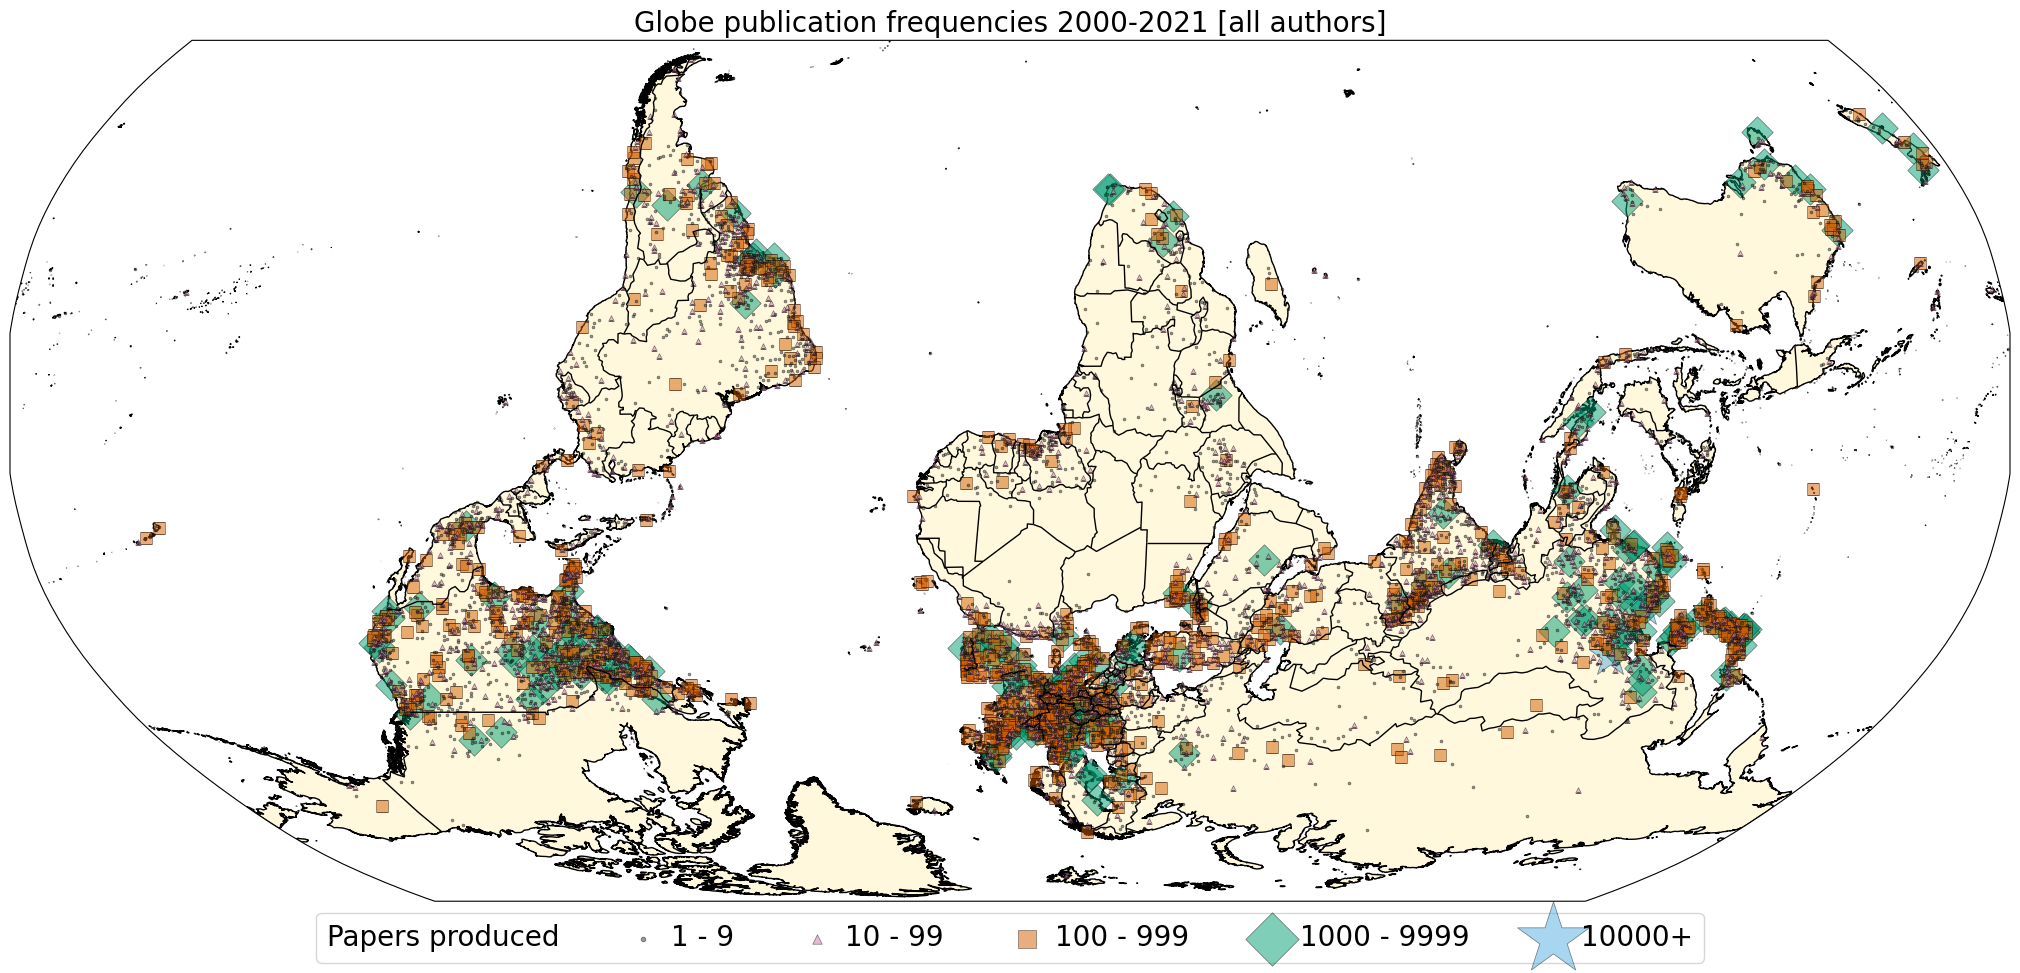

In [21]:
fs = 20
NNN = 2e1
exts = [-179,179,-58, 85]

prj = ccrs.Robinson()
trn = ccrs.PlateCarree()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0, 0, 1, 1], projection=prj)

ax.add_feature(land_10m, zorder=0, edgecolor='black', facecolor='cornsilk')
ax.set_extent(exts)
for i in range(5):
    idx = i + 1
    ax.scatter(dfred.longitude.values[vals==idx], dfred.latitude.values[vals==idx], 
               transform=trn, 
               s = 4**idx, c=colors[i], 
               marker=markers[i], alpha=0.5, zorder=10-i,
               edgecolor='k', linewidth=0.5,
               label = labels[i]);

ax.add_feature(cfeature.BORDERS, zorder=19, edgecolor='black', linestyle='-');

title = 'Globe publication frequencies 2000-2021 [all authors]'

ax.set_title(title, fontsize=fs)
legend = fig.legend(fontsize=fs,
           loc = 'lower center',
           markerscale = 1.7,
           labelspacing = 1,
           ncol = len(labels), 
           bbox_to_anchor=(0.5, -0.02),
           title = 'Papers produced',
           title_fontsize = fs,
           borderaxespad = 1,
           handletextpad = 0)
legend_title_left(legend)

filename = '../plots/frequencies_globe'
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')

filename = filename + '_inv'
fig.gca().invert_yaxis()
plt.savefig(filename + '.jpg', dpi=600, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '_small.jpg', dpi=96, format='jpg', bbox_inches='tight', pil_kwargs={'optimize':True})
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')